In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [9]:
data= pd.read_csv('svmk.csv')
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [10]:
real_x= data.iloc[:,[2,3]].values
real_y= data.iloc[:,4].values

In [11]:
train_x ,test_x , train_y , test_y= train_test_split(real_x,real_y,test_size=0.25,random_state=0)

In [12]:
# feature scaling
s_c= StandardScaler()
train_x= s_c.fit_transform(train_x)
test_x= s_c.fit_transform(test_x)

In [17]:
classifier_svmk= SVC(kernel='rbf' , random_state=0)
classifier_svmk.fit(train_x,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [18]:
y_pred=  classifier_svmk.predict(test_x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [19]:
test_y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [20]:
#confusion matrix
c_m= confusion_matrix(test_y,y_pred)
c_m

array([[64,  4],
       [ 3, 29]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


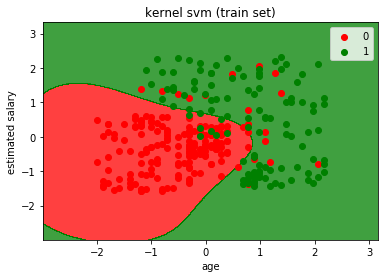

In [23]:
from matplotlib.colors import ListedColormap
x_set , y_set = train_x , train_y
x1 , x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max() + 1 , step=0.01), 
                      np.arange(start=x_set[:,0].min()-1, stop=x_set[:,1].max() + 1 , step=0.01))

plt.contourf(x1,x2,classifier_svmk.predict(np.array([x1.ravel(), x2.ravel()  ]).T).reshape(x1.shape), 
             alpha=0.75, cmap=ListedColormap(('red','green')))

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)) :
    plt.scatter(x_set[y_set == j,0], x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i), label=j)
plt.title('kernel svm (train set)')
plt.xlabel('age')
plt.ylabel('estimated salary')
plt.legend()
plt.show() 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


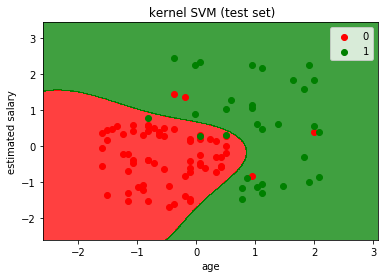

In [24]:
 from matplotlib.colors import ListedColormap
x_set , y_set = test_x , test_y
x1 , x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max() + 1 , step=0.01), 
                      np.arange(start=x_set[:,0].min()-1, stop=x_set[:,1].max() + 1 , step=0.01))

plt.contourf(x1,x2,classifier_svmk.predict(np.array([x1.ravel(), x2.ravel()  ]).T).reshape(x1.shape), 
             alpha=0.75, cmap=ListedColormap(('red','green')))

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)) :
    plt.scatter(x_set[y_set == j,0], x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i), label=j)
plt.title(' kernel SVM (test set)')
plt.xlabel('age')
plt.ylabel('estimated salary')
plt.legend()
plt.show()   